# Generate Data

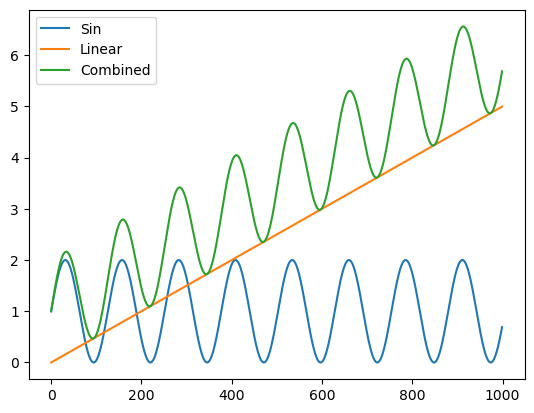

In [113]:
import numpy as np
import matplotlib.pyplot as plt

sin = 1+np.sin(np.arange(1000)*.05)
linear = np.arange(1000)*.005
combined = sin + linear

# Split the data into train and test sets
train_size = int(len(combined) * 0.8)
train, test = combined[:train_size], combined[train_size:]

plt.plot(sin, label='Sin')
plt.plot(linear, label='Linear')
plt.plot(combined, label='Combined')
plt.legend()
plt.show()


Exponential Smoothing:
$ S_t = \alpha y_t + (1 - \alpha) S_{t-1} $, where
- $ S_t $ is the smoothed value at time $ t $
- $ y_t $ is the actual value at time $ t $
- $ \alpha $ is the smoothing parameter, $ 0 \leq \alpha \leq 1 $


ARIMA
$ \phi(B)(1 - B)^d y_t = \theta(B) \varepsilon_t $, where
- $ p $ is the order of the autoregressive (AR) part
- $ d $ is the degree of differencing
- $ q $ is the order of the moving average (MA) part
- $ B $ is the backshift operator, $ B^k y_t = y_{t-k} $
- $ \phi(B) $ is the AR polynomial, $ \phi(B) = 1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p $
- $ \theta(B) $ is the MA polynomial, $ \theta(B) = 1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q $
- $ \varepsilon_t $ is the white noise error term at time $ t $


/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


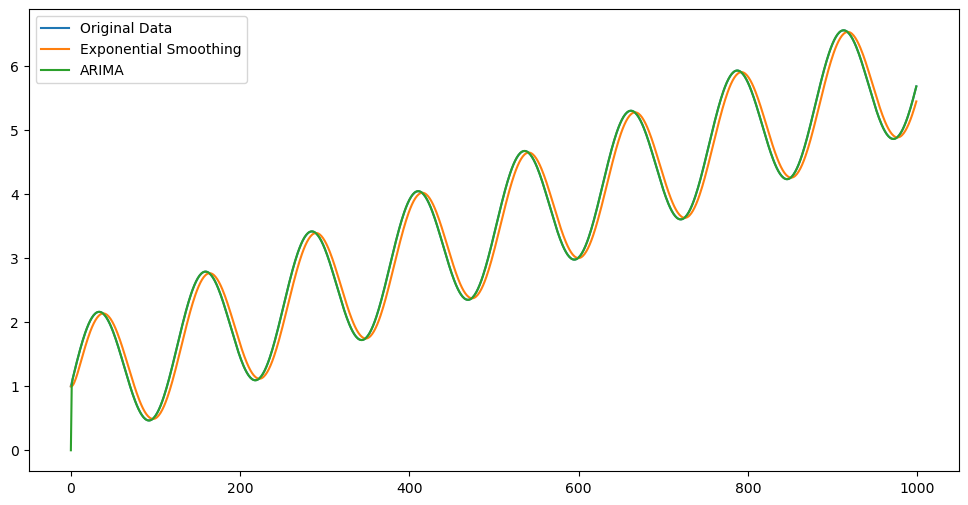

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Fit Exponential Smoothing model
exp_model = SimpleExpSmoothing(combined).fit(smoothing_level=0.2, optimized=False)
exp_smoothing_forecast = exp_model.fittedvalues

# Fit ARIMA model
arima_model = ARIMA(combined, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.fittedvalues

# Plot original data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(combined, label='Original Data')
plt.plot(exp_smoothing_forecast, label='Exponential Smoothing')
plt.plot(arima_forecast, label='ARIMA')
plt.legend()
plt.show()

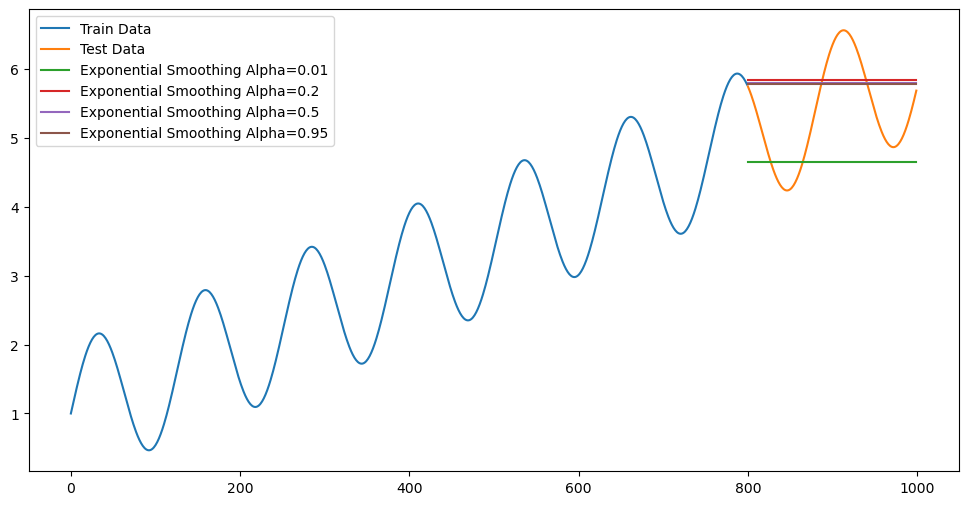

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')

for alpha in [0.01, 0.2, 0.5, 0.95]:
    exp_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    exp_smoothing_forecast = exp_model.forecast(len(test))
    plt.plot(np.arange(train_size, len(combined)), exp_smoothing_forecast, label=f'Exponential Smoothing Alpha={alpha}')

plt.legend()
plt.show()

# Adding seasonality 
This is data dependent. I find the seasonality by looking at when the sin function repeats 

Average distance between peaks: 125.67


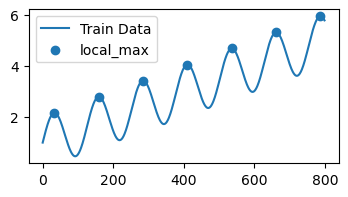

In [112]:
peaks = []
for i, n in enumerate(train):
    if i == 0 or i >= len(train)-1:
        pass
    else:
        if n > train[i-1] and n > train[i+1]:
            peaks.append(i)

print(f"Average distance between peaks: {round(sum(list(map(lambda x1, x2: x2-x1, peaks[:-1], peaks[1:]))) / len(peaks[:-1]), 2)}")

plt.figure(figsize=(4, 2))
plt.plot(train, label='Train Data')
plt.scatter(peaks, train[peaks], label='local_max')
plt.legend()
plt.show()

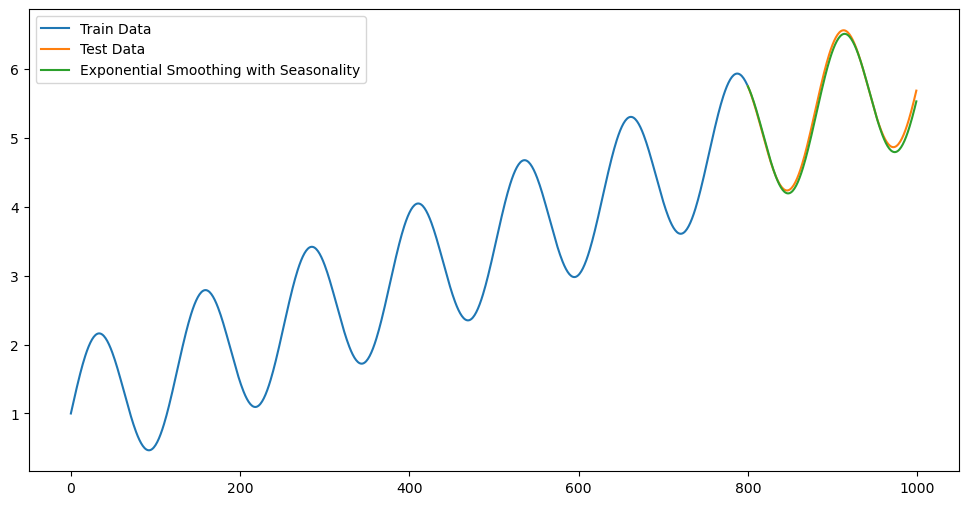

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')

exp_model = ExponentialSmoothing(train,
                seasonal_periods=126,
                trend="add",
                seasonal="add").fit()
exp_smoothing_forecast = exp_model.forecast(len(test))
plt.plot(np.arange(train_size, len(combined)), exp_smoothing_forecast, label=f'Exponential Smoothing with Seasonality')
plt.legend()
plt.show()

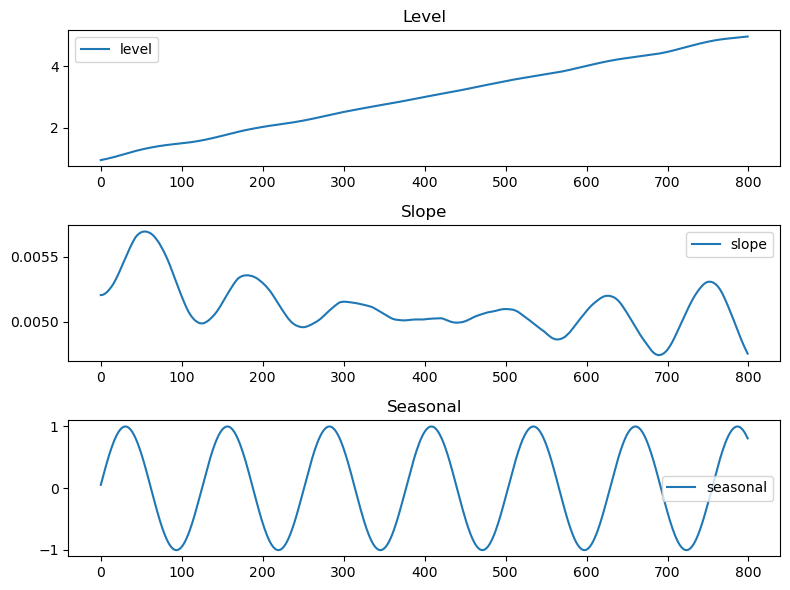

In [148]:
states = pd.DataFrame(
    np.c_[exp_model.level, exp_model.trend, exp_model.season],
    columns=["level", "slope", "seasonal"]
)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))
states[["level"]].plot(ax=ax1, title="Level")
states[["slope"]].plot(ax=ax2, title="Slope")
states[["seasonal"]].plot(ax=ax3, title="Seasonal")
plt.tight_layout()
plt.show()

/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30738D+08    |proj g|=  5.24229D+13

At iterate    5    f=  4.33743D+01    |proj g|=  1.36278D+04

At iterate   10    f=  3.56048D+00    |proj g|=  6.62664D+02

At iterate   15    f= -1.06381D+00    |proj g|=  2.65629D+01

At iterate   20    f= -1.32502D+00    |proj g|=  2.77580D+00

At iterate   25    f= -4.44983D+00    |proj g|=  7.94985D+01

At iterate   30    f= -6.17641D+00    |proj g|=  6.45943D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    143      3     0     0   3.962D+01  -6.176D+00
  F =  -6.1764170296188876     

ABNORMAL_TERMINATION_IN_LNSRCH                              


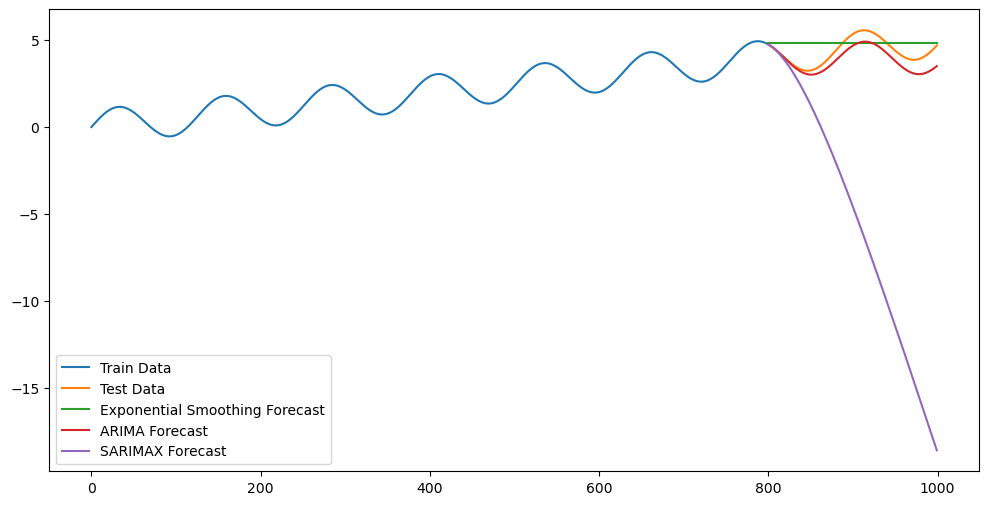

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit Exponential Smoothing model on train data
exp_model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
exp_smoothing_forecast = exp_model.forecast(len(test))

# Fit ARIMA model on train data with adjusted parameters
# arima_model = ARIMA(train, order=(1, 1, 1))
arima_model = ARIMA(train, order=(2, 1, 1))
arima_fit = arima_model.fit(method_kwargs={"warn_convergence": False})
arima_forecast = arima_fit.forecast(len(test))

# Fit SARIMAX model on train data
# sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(len(test))

# Plot original train and test data, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')
plt.plot(np.arange(train_size, len(combined)), exp_smoothing_forecast, label='Exponential Smoothing Forecast')
plt.plot(np.arange(train_size, len(combined)), arima_forecast, label='ARIMA Forecast')
plt.plot(np.arange(train_size, len(combined)), sarimax_forecast, label='SARIMAX Forecast')
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30738D+08    |proj g|=  5.24229D+13


 This problem is unconstrained.



At iterate    5    f=  4.33743D+01    |proj g|=  1.36278D+04

At iterate   10    f=  3.56048D+00    |proj g|=  6.62664D+02

At iterate   15    f= -1.06381D+00    |proj g|=  2.65629D+01

At iterate   20    f= -1.32502D+00    |proj g|=  2.77580D+00

At iterate   25    f= -4.44983D+00    |proj g|=  7.94985D+01

At iterate   30    f= -6.17641D+00    |proj g|=  6.45943D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33    143      3     0     0   3.962D+01  -6.176D+00
  F =  -6.1764170296188876     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


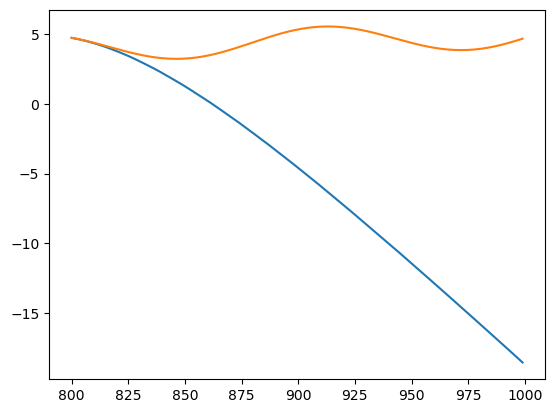

In [35]:
sarimax_model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(len(test))
plt.plot(np.arange(train_size, len(combined)), sarimax_forecast, label='SARIMAX Forecast')
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71189D+07    |proj g|=  2.71189D+12
  ys=-2.512E+01  -gs= 9.653E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/jordanbarker/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    4      3     62      3     1     0   1.309D+04  -8.697D+00
  F =  -8.6967851778906144     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


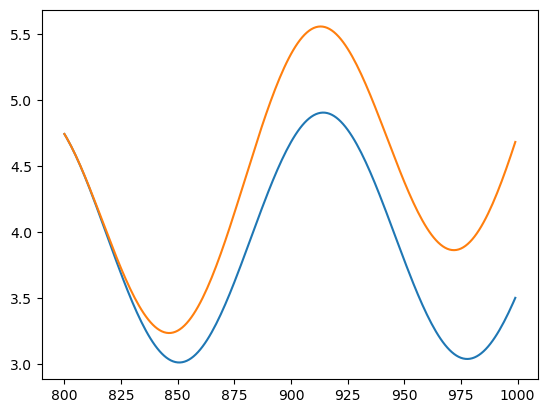

In [38]:
sarimax_model = SARIMAX(train, order=(2, 1, 1))
sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(len(test))
plt.plot(np.arange(train_size, len(combined)), sarimax_forecast, label='SARIMAX Forecast')
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')

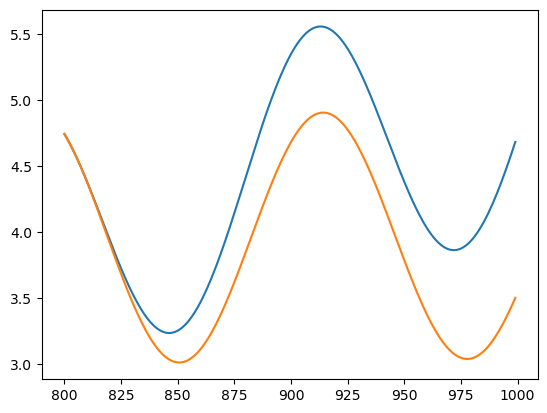

In [32]:
arima_model = ARIMA(train, order=(2, 1, 1))
arima_fit = arima_model.fit(method_kwargs={"warn_convergence": False})
arima_forecast = arima_fit.forecast(len(test))
plt.plot(np.arange(train_size, len(combined)), test, label='Test Data')
plt.plot(np.arange(train_size, len(combined)), arima_forecast, label='ARIMA Forecast')


# Box-Cox Transformation
Transforms the target variable so that data resembles a normal distribution which is assumed by many models.

Cons:
* Harder to interprete
* Usually gives the median of the forecast distribution when we revert the transformed data to its original scale.

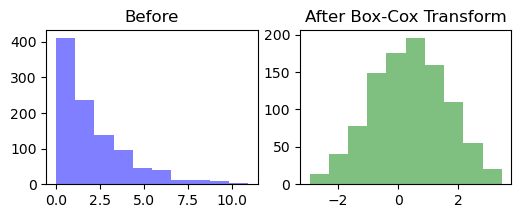

In [129]:
from scipy import stats

data = np.random.exponential(scale=2, size=1000)
plt.figure(figsize=(6, 2))
plt.subplot(1, 2, 1)
plt.hist(data, bins=10, alpha=0.5, color='blue')
plt.title("Before")

transformed_data, lambda_best = stats.boxcox(data)
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=10, alpha=0.5, color='green')
plt.title("After Box-Cox Transform")
plt.show()